$\textbf{Exercise A}$

Given


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from Formulas import f

M = 0.82
P_fl390, T_fl390, Rho_fl390 =f.get_atmosphere_properties(39000,'ft')
V = f.Mach_To_V_Calc(M,T_fl390)
#Boeing 777
S_B = 427.8
mass_B = 304000

#F16
S_F = 28.87
mass_f = 11000
k = 0.117
Cd_0 = 0.0169

In [10]:
print("=== 1. Aerodynamic forces at FL390 === \n")
Lift_B = mass_B*9.81
CL_B = f.V_To_CL_Calc(mass_B,V,Rho_fl390,S_B,0)
Cd_B = f.Cd_Calc(0.018,0.045,CL_B)

Drag_B = f.Thrust_Calc(Cd_B,Rho_fl390,V,S_B)

Result_B, Orientation_B = f.Aero_Force_Resultant(Lift_B,Drag_B)
CL_CD_B  = Lift_B/Drag_B
print(f"B777: L/D = {CL_CD_B:.2f}, Resultant = {Result_B:.2f} N, Orientation = {Orientation_B:.2f}°\n" )

Lift_f = mass_f*9.81
CL_f = f.V_To_CL_Calc(mass_f,V,Rho_fl390,S_F,0)
Cd_f = f.Cd_Calc(Cd_0,k,CL_f)

Drag_f = f.Thrust_Calc(Cd_f,Rho_fl390,V,S_F)

Result_f, Orientation_f = f.Aero_Force_Resultant(Lift_f,Drag_f)
CL_CD_f  = Lift_f/Drag_f
print(f"F 16: L/D = {CL_CD_f:.2f}, Resultant = {Result_f:.2f} N, Orientation = {Orientation_f:.2f}°" )




=== 1. Aerodynamic forces at FL390 === 

B777: L/D = 17.31, Resultant = 2987214.88 N, Orientation = 3.31°

F 16: L/D = 11.22, Resultant = 108337.43 N, Orientation = 5.09°


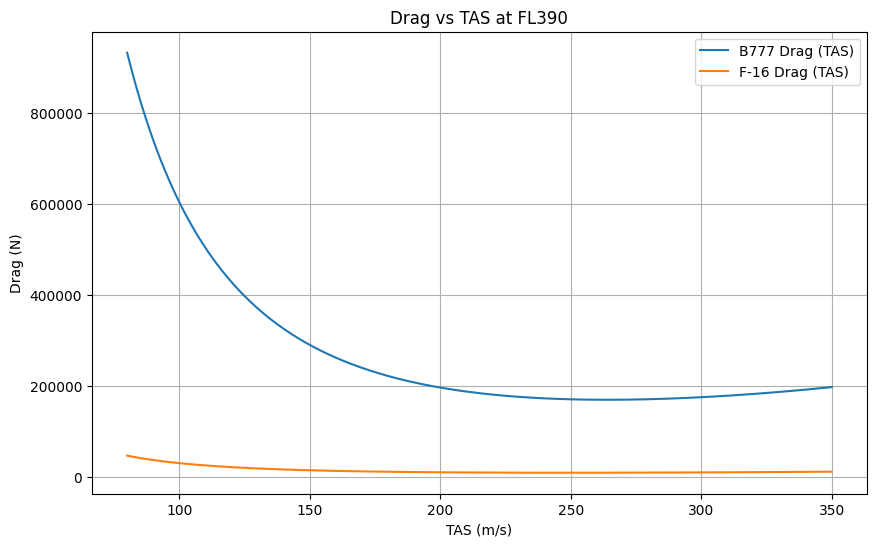

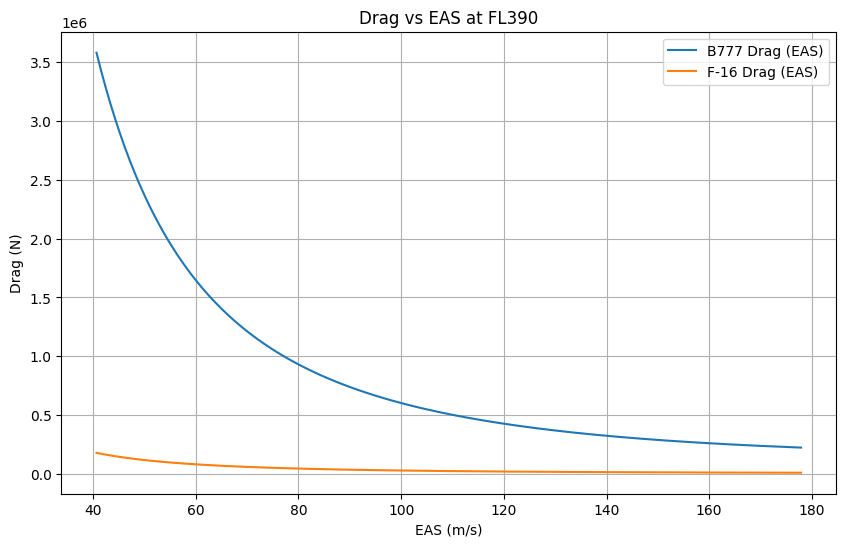

In [11]:
V_range = np.linspace(80, 350, 300)

CL_B = f.V_To_CL_Calc(mass_B,V_range,Rho_fl390,S_B,0)
Cd_B = f.Cd_Calc(0.018,0.045,CL_B)
Drag_B = f.Thrust_Calc(Cd_B,Rho_fl390,V_range,S_B)

CL_f = f.V_To_CL_Calc(mass_f,V_range,Rho_fl390,S_F,0)
Cd_f = f.Cd_Calc(Cd_0,k,CL_f)

Drag_f = f.Thrust_Calc(Cd_f,Rho_fl390,V_range,S_F)

plt.figure(figsize=(10,6))
plt.plot(V_range, Drag_B, label="B777 Drag (TAS)")
plt.plot(V_range, Drag_f, label="F-16 Drag (TAS)")
plt.xlabel("TAS (m/s)")
plt.ylabel("Drag (N)")
plt.legend()
plt.grid()
plt.title("Drag vs TAS at FL390")
plt.show()    

EAS_range = f.EAS(V_range, Rho_fl390)

CL_B = f.V_To_CL_Calc(mass_B,EAS_range,Rho_fl390,S_B,0)
Cd_B = f.Cd_Calc(0.018,0.045,CL_B)
Drag_B = f.Thrust_Calc(Cd_B,Rho_fl390,EAS_range,S_B)

CL_f = f.V_To_CL_Calc(mass_f,EAS_range,Rho_fl390,S_F,0)
Cd_f = f.Cd_Calc(Cd_0,k,CL_f)

Drag_f = f.Thrust_Calc(Cd_f,Rho_fl390,EAS_range,S_F)

plt.figure(figsize=(10,6))
plt.plot(EAS_range, Drag_B, label="B777 Drag (EAS)")
plt.plot(EAS_range, Drag_f, label="F-16 Drag (EAS)")
plt.xlabel("EAS (m/s)")
plt.ylabel("Drag (N)")
plt.legend()
plt.grid()
plt.title("Drag vs EAS at FL390")
plt.show()

In [13]:
 # ----------------------------------------------------------
 #     # 4. Airspeed that minimizes thrust --> CL_opt
# ----------------------------------------------------------
v_Min_B, L_D_OPT_B, CLopt_B = f.Optimal_Val_Min_T(mass_B*9.81, S_B, Rho_fl390, 0.018, 0.045)
V_Min_F, L_D_OPT_F, CLopt_F = f.Optimal_Val_Min_T(mass_f*9.81, S_F, Rho_fl390,0.0169, 0.117 )

#V_min Kan ook^^^^
print("\n=== 4. Airspeed that minimizes Thrust ===")
print(f"B777: V_opt = {v_Min_B:.1f} m/s, EAS = {f.EAS(v_Min_B, Rho_fl390):.1f} m/s")
print(f"F16 : V_opt = {V_Min_F:.1f} m/s, EAS = {f.EAS(V_Min_F, Rho_fl390):.1f} m/s")
print(f"B777 : CL/CD Opt = {L_D_OPT_B:.1f}")
print(f"F16 : CL/CD Opt = {L_D_OPT_F:.1f}")


=== 4. Airspeed that minimizes Thrust ===
B777: V_opt = 263.9 m/s, EAS = 134.1 m/s
F16 : V_opt = 249.3 m/s, EAS = 126.7 m/s
B777 : CL/CD Opt = 17.6
F16 : CL/CD Opt = 11.2
